<a href="https://colab.research.google.com/github/suri47/Clustering-and-Sentiment-Analysis/blob/main/Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
from numpy import unique
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)                                       # To Display all the columns present in the Data Frame


In [ ]:
path1 = '/content/Metadata.csv'
path2='/content/Reviews.csv'

meta_df = pd.read_csv(path1)
rview_df= pd.read_csv(path2)

In [ ]:
def remove_outlier(df,column):
    df = df[((df[column] - df[column].mean()) / df[column].std().__abs__() < 3)]
    df = df[((df[column] - df[column].mean()) / df[column].std().__abs__() > -3)]


In [ ]:
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')
meta_df.drop(['Links','Timings'],axis=1,inplace=True)
meta_df.rename(columns={'Name':'Restaurant'},inplace=True)
meta_df['Collections'].fillna('Unknown',inplace=True)

In [ ]:
remove_outlier(meta_df,'Cost')                                                  # The outlier will be trea

In [ ]:
top_10_costly_rest=meta_df[['Restaurant','Cost']].groupby('Restaurant',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

In [ ]:
# Import Libraries
import numpy as np
from numpy import unique
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)                                       # To Display all the columns present in the Data Frame

import datetime

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

import re
import string
import spacy

!pip install contractions
import contractions

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import KNNImputer

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

(-0.5, 1399.5, 1399.5, -0.5)

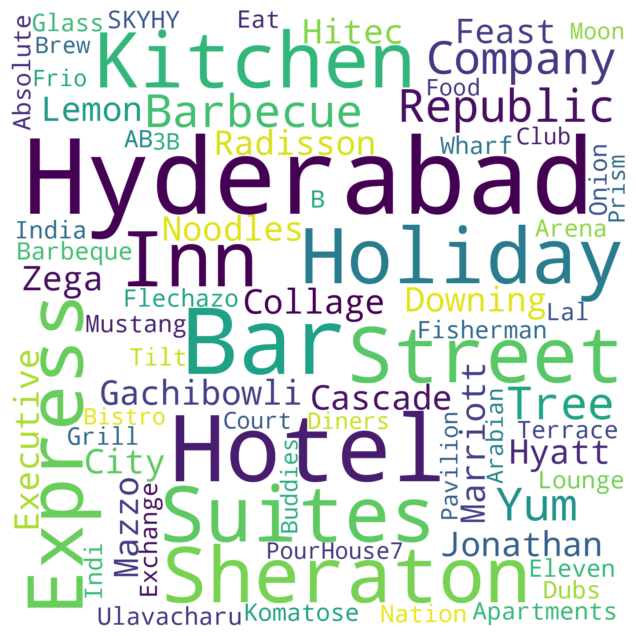

In [ ]:
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Restaurant[:30])
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sw = stopwords.words('english')

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stopwords from Cuisines
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [ ]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_punctuation(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [ ]:
import re

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [ ]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [ ]:
from collections import Counter
text = ' '.join(meta_df['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [ ]:
word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

(-0.5, 1399.5, 1399.5, -0.5)

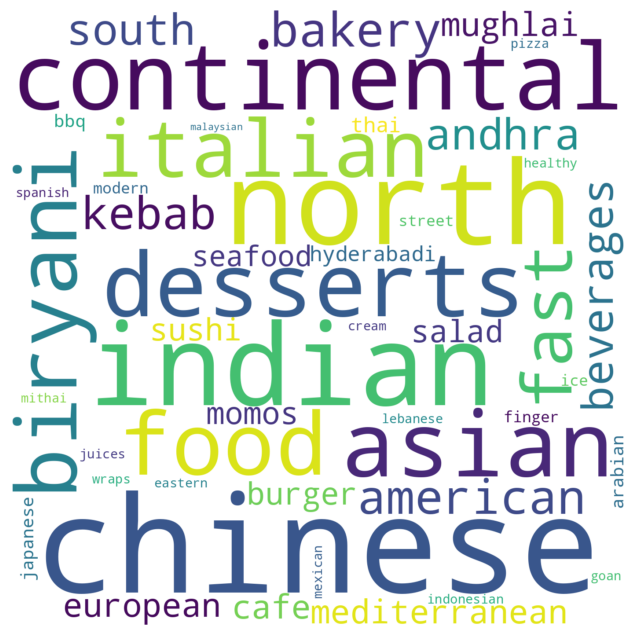

In [ ]:
#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:

rview_df.loc[rview_df['Rating'] == 'Like'] = np.nan
rview_df['Rating']= rview_df['Rating'].astype('float64')

In [ ]:
print(rview_df['Rating'].mean())

3.601044071880333


In [ ]:
rview_df['Rating'].fillna(3.6, inplace=True)

In [ ]:
print(rview_df.columns)


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [ ]:
rview_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0


In [ ]:
# split metadata column into 2 columns i.e. Reviews and followers
rview_df[['Reviews','Followers']] = rview_df['Metadata'].str.split(',', n=1, expand=True)

In [ ]:
rview_df['Reviews'] = pd.to_numeric(rview_df['Reviews'].str.split(' ').str[0])

In [ ]:
rview_df['Followers']= pd.to_numeric(rview_df['Followers'].str.split(' ').str[1])

In [ ]:
rview_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3.0,2.0


In [ ]:
# Converting Time column into Time, Year, Month, Hour
rview_df['Time']=pd.to_datetime(rview_df['Time'])
rview_df['Year'] = pd.DatetimeIndex(rview_df['Time']).year
rview_df['Month'] = pd.DatetimeIndex(rview_df['Time']).month
rview_df['Hour'] = pd.DatetimeIndex(rview_df['Time']).hour
rview_df = rview_df.drop(['Metadata'], axis =1)

In [ ]:
rview_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
# Replacing followers and reviews null values into 0
rview_df['Followers'].fillna(0,inplace=True)
rview_df['Reviews'].fillna(0,inplace=True)

In [ ]:
rview_df.dropna(inplace=True)
rview_df.reset_index(inplace = True)

In [ ]:
reviewer_list = rview_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()

,Reviewer,Review_Count
654,Ankita,13
3855,Parijat Ray,13
2652,Kiran,12
7009,Vedant Killa,11
2311,Jay Mehta,11


In [ ]:
# Average of the ratings of reviewers with review count
review_ratings=rview_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15]
top_reviewers_ratings=top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)
top_reviewers_ratings.head()

,Reviewer,Review_Count,AverageRatings
2,Kiran,12,4.500000
11,Prachita Jayaswal,9,4.333333
3,Vedant Killa,11,4.000000
6,Sravani,10,4.000000
10,Prasun Gokhlani,9,4.000000


In [ ]:
review= rview_df.Review
review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9949    Madhumathi Mahajan Well to start with nice cou...
9950    This place has never disappointed us.. The foo...
9951    Bad rating is mainly because of "Chicken Bone ...
9952    I personally love and prefer Chinese Food. Had...
9953    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [ ]:
rview_df['Review'] = rview_df['Review'].apply(remove_punctuation)
rview_df['Review'] = rview_df['Review'].apply(stopwords)
review=rview_df.Review
review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9949    madhumathi mahajan well start nice courteous s...
9950    place never disappointed us food courteous sta...
9951    bad rating mainly chicken bone found veg food ...
9952    personally love prefer chinese food couple tim...
9953    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [ ]:
review=lemmatization_(review)

In [ ]:
# remove_all_extra_spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [ ]:
review=remove_spaces(review)

In [ ]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [ ]:
review=remove_non_leters(review)

In [ ]:
# storing the reviews in a feature of df
rview_df['Review']=review
rview_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [ ]:
rview_df['Review']=rview_df['Review'].apply(lambda x:len_less_than2(x))

In [ ]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [ ]:
#Create a function to get the subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
#Create a function to get the polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
#Create two new columns
rview_df['Subjectivity'] = rview_df['Review'].apply(subjectivity)
rview_df['Polarity'] = rview_df['Review'].apply(polarity)

In [ ]:
rview_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,Subjectivity,Polarity
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0,0.720000,0.660000
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0,0.691667,0.708333
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0,0.675000,0.550000
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0,0.675000,0.750000
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0,0.475000,0.500000


In [ ]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
rview_df['Analysis'] = rview_df['Polarity'].apply(getAnalysis)

In [ ]:
# plot the polarity and subjectivity
fig = px.scatter(rview_df,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size='Subjectivity')

In [ ]:
#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

In [ ]:
# Converting Analysis into numeric form Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment


In [ ]:
rview_df['Analysis']=rview_df['Analysis'].apply(lambda x:sentiment(x))

In [ ]:
sentiment_df= rview_df[['Review','Rating','Analysis']]
sentiment_df.head()


,Review,Rating,Analysis
0,ambience good food quite good saturday lunch c...,5.0,0
1,ambience good pleasant evening service prompt ...,5.0,0
2,must try great food great ambience thnx servic...,5.0,0
3,soumen das arun great guy behavior sincerety g...,5.0,0
4,food goodwe order kodi drumstick basket mutton...,5.0,0


In [ ]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])

In [ ]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score

In [ ]:
# ML Model - 1 Implementation
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()

In [ ]:
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#predicting the values of y from x via model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
def model_details(y_train, y_test, y_pred_train, y_pred_test):
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  classification_rep= classification_report(y_pred_test, y_test)

  print("The classification report on the train data is :")
  print(classification_rep)


In [ ]:
model_details(y_train, y_test, y_pred_train, y_pred_test)

Train accuracy is: 0.8372404554588078
Test accuracy is: 0.8272398553635998
The confusion matrix on the test data is :
[[2021  430]
 [   0   38]]
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2451
           1       0.08      1.00      0.15        38

    accuracy                           0.83      2489
   macro avg       0.54      0.91      0.53      2489
weighted avg       0.99      0.83      0.89      2489



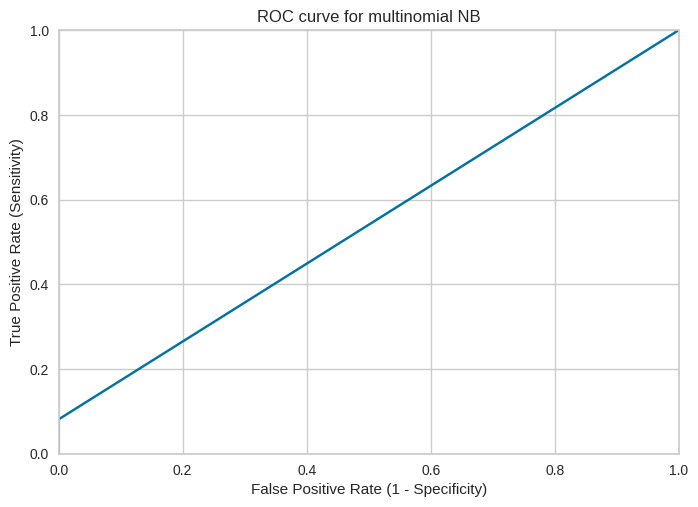

In [ ]:
# ROC Curve graph
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for multinomial NB')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
rf= RandomForestClassifier()
grid_values_rf = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfc = GridSearchCV(estimator=rf,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [ ]:
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'n_estimators': [100, 150]},
             scoring='recall', verbose=5)

In [ ]:
random_y_pred_train=rfc.predict(X_train)
random_y_pred_test=rfc.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
model_details(y_train, y_test, random_y_pred_train, random_y_pred_test)

Train accuracy is: 0.8162089752176825
Test accuracy is: 0.8127762153475291
The confusion matrix on the test data is :
[[2021  466]
 [   0    2]]
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      2487
           1       0.00      1.00      0.01         2

    accuracy                           0.81      2489
   macro avg       0.50      0.91      0.45      2489
weighted avg       1.00      0.81      0.90      2489



In [ ]:
# ML Model - 3 Implementation
xgbc=XGBClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
xgbc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

In [ ]:
xgb_y_pred_train=xgbc_grid.predict(X_train)
xgb_y_pred_test=xgbc_grid.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
model_details(y_train, y_test, xgb_y_pred_train, xgb_y_pred_test)

Train accuracy is: 0.9961152042866711
Test accuracy is: 0.9377259943752511
The confusion matrix on the test data is :
[[1974  108]
 [  47  360]]
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2082
           1       0.77      0.88      0.82       407

    accuracy                           0.94      2489
   macro avg       0.87      0.92      0.89      2489
weighted avg       0.94      0.94      0.94      2489



In [ ]:
from sklearn import svm

In [ ]:
svm_clf = svm.SVC(probability=True)
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
svm_y_train_pred = svm_clf.predict(X_train)
svm_y_test_pred = svm_clf.predict(X_test)

In [ ]:
model_details(y_train, y_test, svm_y_train_pred, svm_y_test_pred)

Train accuracy is: 0.9961152042866711
Test accuracy is: 0.9240658899156288
The confusion matrix on the test data is :
[[1997  165]
 [  24  303]]
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2162
           1       0.65      0.93      0.76       327

    accuracy                           0.92      2489
   macro avg       0.82      0.93      0.86      2489
weighted avg       0.94      0.92      0.93      2489



In [ ]:
Comparison_dict={'Model_Name':['MultinomialNB','Random Forest','XGB', 'Support Vector Machine'],
                  'Training_accuracy':[0.8397,0.8176,0.988,0.99],
                  'Test_accuracy':[0.8264,0.8123,0.9280,0.9212]}

In [ ]:
Comparison_df=pd.DataFrame(Comparison_dict)
Comparison_df

,Model_Name,Training_accuracy,Test_accuracy
0,MultinomialNB,0.8397,0.8264
1,Random Forest,0.8176,0.8123
2,XGB,0.9880,0.9280
3,Support Vector Machine,0.9900,0.9212


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import gensim.corpora as corpora
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Fold 1 Coherence: nan
Fold 2 Coherence: nan
Fold 3 Coherence: nan
Fold 4 Coherence: nan
Fold 5 Coherence: nan


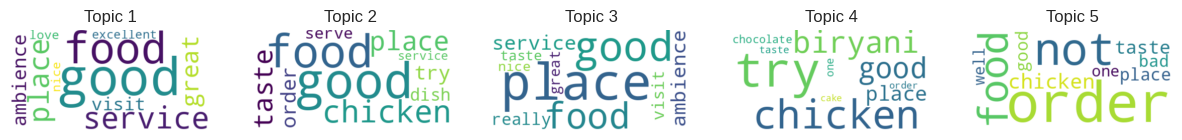

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
from wordcloud import WordCloud

reviews = rview_df['Review'].tolist()

# Create a dictionary and corpus
corpus = [review.split() for review in reviews]
dictionary = Dictionary(corpus)
corpus_bow = [dictionary.doc2bow(text) for text in corpus]

# Define the number of topics
num_topics = 5

# Initialize an empty list for coherence scores
coherence_scores = []

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(corpus_bow):
    train_corpus = [corpus_bow[i] for i in train_index]
    test_corpus = [corpus_bow[i] for i in test_index]

    # Train the LDA model
    lda_model = LdaModel(train_corpus, num_topics=num_topics, id2word=dictionary)

    # Compute coherence score on the test set
    cm = CoherenceModel(model=lda_model, texts=test_corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = cm.get_coherence()
    coherence_scores.append(coherence_score)

# Print coherence scores for each fold
for i, score in enumerate(coherence_scores):
    print(f'Fold {i+1} Coherence: {score:.4f}')

# Train the LDA model on the entire dataset
lda_model = LdaModel(corpus_bow, num_topics=num_topics, id2word=dictionary)


# Visualization: Word Cloud
fig, axs = plt.subplots(1, num_topics, figsize=(15, 5))
for i in range(num_topics):
    topic_words = lda_model.show_topic(i)
    word_cloud = WordCloud(background_color='white').generate_from_frequencies(dict(topic_words))
    axs[i].imshow(word_cloud, interpolation='bilinear')
    axs[i].set_title(f'Topic {i+1}')
    axs[i].axis('off')
plt.show()

In [ ]:
meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x : x.lower())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
cuisine_df=meta_df_main.loc[:,['Name','Cost','Cuisines']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
cuisine_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,"1,300","asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","asian, continental, north indian, chinese, med..."


In [ ]:
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
rview_df['Rating'].unique()
rview_df.dropna(subset=['Rating'],inplace=True)
rview_df['Rating'] = rview_df['Rating'].replace('Like', '4')
rview_df['Rating']= rview_df['Rating'].astype('float')
rview_df.dropna(subset =['Review'], inplace=True)
ratings_df  = rview_df.groupby('Restaurant')['Rating'].mean().reset_index()
ratings_df .sort_values(by='Rating',ascending = False).head(15)
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
ratings_df .sort_values(by='Rating',ascending = False).head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Restaurant,Rating
3,AB's - Absolute Barbecues,4.880
11,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
67,Paradise,4.700
35,Flechazo,4.660
87,The Indi Grill,4.600
97,Zega - Sheraton Hyderabad Hotel,4.450
64,Over The Moon Brew Company,4.340
16,Beyond Flavours,4.280
19,Cascade - Radisson Hyderabad Hitec City,4.260


In [ ]:
df_cluster.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,chinese,continental,desserts,european,fastfood,fingerfood,goan,healthyfood,hyderabadi,icecream,indonesian,italian,japanese,juices,kebab,lebanese,malaysian,mediterranean,mexican,mithai,modernindian,momos,mughlai,northeastern,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


In [ ]:
# Changing name and order of columns
df_cluster = df_cluster[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



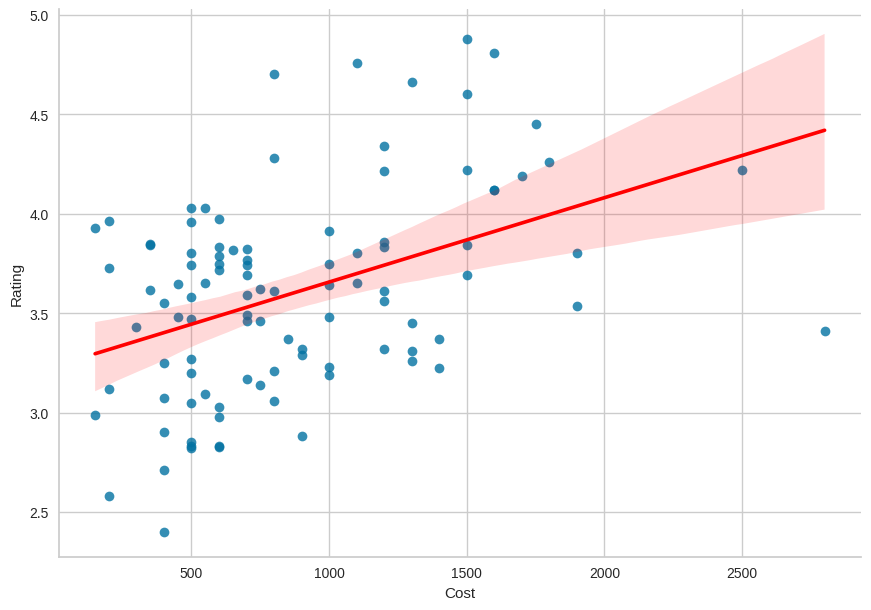

In [ ]:
df_cluster['Cost']= df_cluster['Cost'].str.replace(',','')
df_cluster['Cost']= df_cluster['Cost'].astype('float')
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name',axis =1)).inertia_
          for i in range(8)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis=1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KMeans(n_clusters=5, random_state=11)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 0, 'Cost')

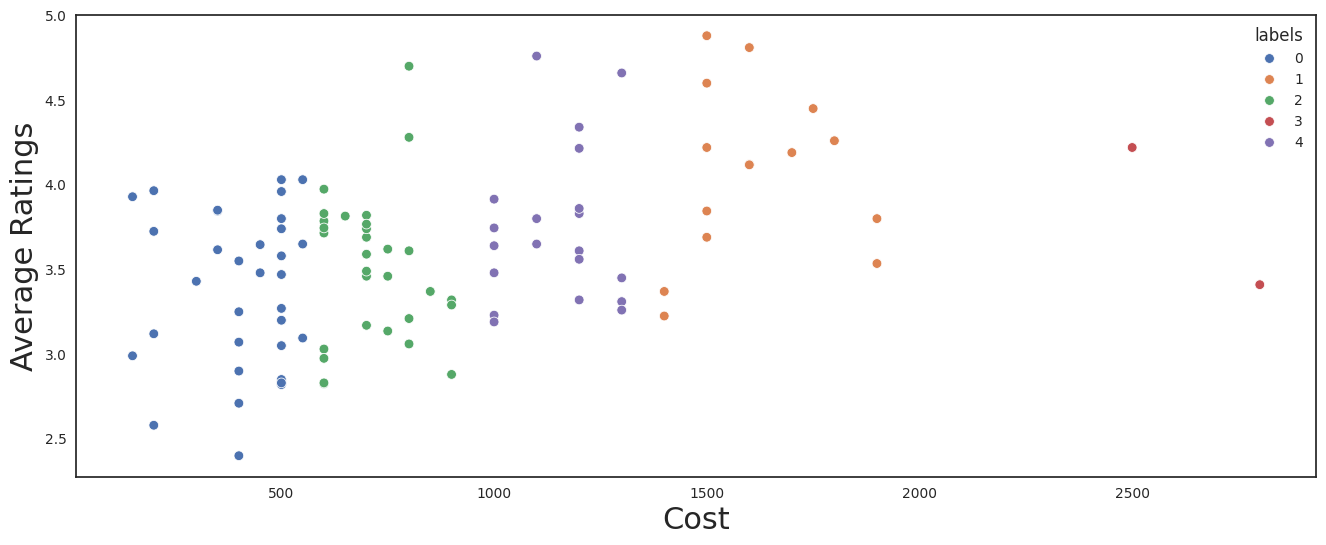

In [ ]:
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))
df_cluster['labels'] = cluster_lbl
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

In [ ]:
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

Top cuisines in cluster 0
 northindian    16
chinese         9
fastfood        8
dtype: int64 

Top cuisines in cluster 1
 northindian    11
continental     6
asian           5
dtype: int64 

Top cuisines in cluster 2
 northindian    18
chinese        18
biryani        11
dtype: int64 

Top cuisines in cluster 3
 asian          2
italian        2
continental    2
dtype: int64 

Top cuisines in cluster 4
 northindian    14
chinese         9
italian         7
dtype: int64 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop('Name',axis =1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
pca.components_
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_
          for i in range(8)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
model1 = KMeans(random_state=11, n_clusters=5)
model1.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KMeans(n_clusters=5, random_state=11)

In [ ]:
cluster_labels = model1.predict(X_pca)
df_cluster['labels'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
list_of_df = [df_0,df_1,df_2,df_3,df_4]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')

Top Cuisines in Cluster 0 
 desserts    12
fastfood    10
cafe         6
dtype: int64 

Top Cuisines in Cluster 1 
 northindian    32
chinese        31
biryani        13
dtype: int64 

Top Cuisines in Cluster 2 
 continental    12
italian         9
northindian     8
dtype: int64 

Top Cuisines in Cluster 3 
 asian      6
chinese    6
thai       2
dtype: int64 

Top Cuisines in Cluster 4 
 northindian      20
mediterranean     4
southindian       4
dtype: int64 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

